In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  1 00:36:24 2019

@author: Parth
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

df=pd.read_csv('Position_Salaries.csv')
X=df.iloc[:,1].values
y=df.iloc[:,2].values

X=X.reshape(-1,1)
y=y.reshape(-1,1)

print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


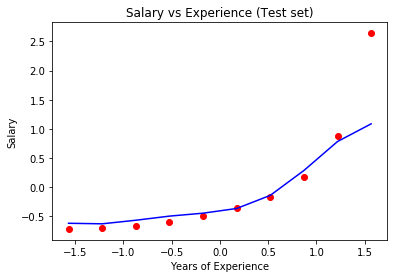

r2 score: 0.7516001070620798


In [2]:
# =============================================================================
# The StandardSclaer library transform the data such that the mean of the dataset 
# becomes 0 and the standard deviation becomes 1. It does so by subtracting every sample
# value by the dataset's mean and dividing the subtracted value by the standard deviation.
# =============================================================================

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y= sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X,y)

# =============================================================================
# -->In order to make custom predictions, the data must be in an array format. Hence 
#    I have created an Numpy array and passed the value as input. 
# -->As the regressor was trained on scaled data, we must also pass the scaled data as
#    input to the regressor. 
# -->The prediction that we will get will also be in the scaled form. So we need to convert 
#    it back from scaled form to the normal form. This is done using inverse_transform method. 
# =============================================================================

y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print("r2 score:",r2_score(y,regressor.predict(X)))
